# Pyber Ride Sharing

## Analysis

#### 1)	The lion’s share of the total rides and total fare comes from the Urban areas. 
#### 2)	From the pie charts, 78% of the total drivers are in Urban areas whereas the rides there are only 68% of the total. Which means that Urban areas have way more number of drivers than required. This may be a reason why the fares are lower.
#### 3)	In Suburban areas, the trend is opposite. 26% of the total rides fall under Suburban whereas percentage of the total drivers there is only 19%. The average fares fall above the Urban cluster. Looks like the driver counts need to go up here.
#### 4)	Very less number of people prefer to ride on Pyber in Rural areas and significant low number of drivers. This leads to the fares being higher in these areas.


In [610]:
# Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship 
# between four key variables:

# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)


In [611]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [612]:
# city data
city_data_df = pd.read_csv('raw_data/city_data.csv')
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [613]:
#locate Port James
port_james = city_data_df.loc[city_data_df["city"] == "Port James",:]
port_james

,city,driver_count,type
84,Port James,15,Suburban
100,Port James,3,Suburban


In [614]:
#Add the driver count of same cites in different rows (126 rows since Port James has a duplicate)
drivers_count = city_data_df.groupby("city")["driver_count"].sum()
city_data_new_df = pd.DataFrame({"Total Drivers Per City":drivers_count})
city_data_new_df = city_data_new_df.reset_index()
city_data_new_df.head()

,city,Total Drivers Per City
0,Alvarezhaven,21
1,Alyssaberg,67
2,Anitamouth,16
3,Antoniomouth,21
4,Aprilchester,49


In [615]:
#locate Port James
port_james = city_data_new_df.loc[city_data_new_df["city"] == "Port James",:]
port_james

,city,Total Drivers Per City
72,Port James,18


In [616]:
#delete duplicate row of Port James in original city data
city_data_df = city_data_df.drop(city_data_df.index[[84]])
port_james = city_data_df.loc[city_data_df["city"] == "Port James",:]
port_james

,city,driver_count,type
100,Port James,3,Suburban


In [617]:
# merge driver count and city type (125 rows now)
#delete duplicate driver_count column
city_data_new_df = pd.merge(city_data_new_df, city_data_df, on='city', how='left')
city_data_new_df.drop('driver_count', axis=1, inplace=True)

city_data_new_df.head()

,city,Total Drivers Per City,type
0,Alvarezhaven,21,Urban
1,Alyssaberg,67,Urban
2,Anitamouth,16,Suburban
3,Antoniomouth,21,Urban
4,Aprilchester,49,Urban


In [618]:
# ride data
ride_data_df = pd.read_csv('raw_data/ride_data.csv')
ride_data_df.head()
#ride_data_df.dtypes

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [619]:
# Average Fare ($) Per City
city_avg_fare = ride_data_df.groupby("city")["fare"].mean()
#print(city_avg_fare)

# Total Number of Rides Per City
city_total_rides = ride_data_df.groupby("city")["fare"].count()
#print(city_total_rides)

#Create a data frame of thes 2 lists
new_data_df = pd.DataFrame({"Average Fare Per City":city_avg_fare, "Total Rides Per City": city_total_rides})

new_data_df = new_data_df.reset_index()
new_data_df.head()


,city,Average Fare Per City,Total Rides Per City
0,Alvarezhaven,23.928710,31
1,Alyssaberg,20.609615,26
2,Anitamouth,37.315556,9
3,Antoniomouth,23.625000,22
4,Aprilchester,21.981579,19


In [620]:
# City Type (Urban, Suburban, Rural)
all_data_df = pd.merge(new_data_df, city_data_new_df, how='left')

all_data_df["Average Fare Per City"] = all_data_df["Average Fare Per City"].map("{:,.2f}".format)

all_data_df.head()


,city,Average Fare Per City,Total Rides Per City,Total Drivers Per City,type
0,Alvarezhaven,23.93,31,21,Urban
1,Alyssaberg,20.61,26,67,Urban
2,Anitamouth,37.32,9,16,Suburban
3,Antoniomouth,23.62,22,21,Urban
4,Aprilchester,21.98,19,49,Urban


In [621]:
# Convert Average fare Per City column to numberic
all_data_df["Average Fare Per City"] = pd.to_numeric(all_data_df["Average Fare Per City"], errors='ignore')
#all_data_df.dtypes

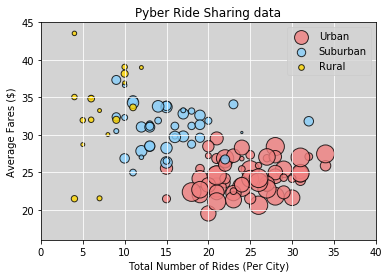

In [622]:
# Create Scatterplots

# Urban data
urban_type_df = all_data_df.loc[all_data_df["type"] == "Urban",:]
urban_x_axis = urban_type_df["Total Rides Per City"]
urban_y_axis = urban_type_df["Average Fare Per City"]
urban_s = urban_type_df["Total Drivers Per City"]
urban = plt.scatter(urban_x_axis, urban_y_axis, marker="o", facecolors="lightcoral", edgecolors="black", s=(urban_s*5),\
                    alpha=0.8, label="Urban")

# Suburban data
suburban_type_df = all_data_df.loc[all_data_df["type"] == "Suburban",:]
suburban_x_axis = suburban_type_df["Total Rides Per City"]
suburban_y_axis = suburban_type_df["Average Fare Per City"]
suburban_s = suburban_type_df["Total Drivers Per City"]
suburban = plt.scatter(suburban_x_axis, suburban_y_axis, marker="o", facecolors="lightskyblue", edgecolors="black", \
                       s=(suburban_s*5), alpha=0.8, label="Suburban")

# Rural data
rural_type_df = all_data_df.loc[all_data_df["type"] == "Rural",:]
rural_x_axis = rural_type_df["Total Rides Per City"]
rural_y_axis = rural_type_df["Average Fare Per City"]
rural_s = rural_type_df["Total Drivers Per City"]
rural = plt.scatter(rural_x_axis, rural_y_axis, marker="o", facecolors="gold", edgecolors="black", s=(rural_s*5),\
                    alpha=0.8, label="Rural")

# Labels
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fares ($)')
plt.title('Pyber Ride Sharing data')
plt.grid(color="white")


plt.xlim(0, 40)
plt.ylim(16, 45)
plt.legend()
plt.rcParams['axes.facecolor'] = 'lightgray'
plt.show()

In [623]:
#ride_data_df.head()

In [624]:
# Merge ride data with city data
all_data2_df = pd.merge(ride_data_df, city_data_new_df, on='city', how='left')
all_data2_df.head()

,city,date,fare,ride_id,Total Drivers Per City,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [625]:
# In addition, you will be expected to produce the following three pie charts:

## % of Total Fares by City Type

# sum of fares by city type and total fare
sum_fare_type = all_data2_df.groupby('type')["fare"].sum()
total_fare = all_data2_df["fare"].sum()
#print(sum_fare_type)
#print(total_fare)

# % of Total Fares by City Type
percent_fares = sum_fare_type / total_fare * 100
#print(percent_fares)

fares_citytype_df = pd.DataFrame({"Fares by Type": sum_fare_type, "Percent Fare by Type (%)": percent_fares})
fares_citytype_df["Percent Fare by Type (%)"] = fares_citytype_df["Percent Fare by Type (%)"].map('{:.2f}'.format)

# converting the % fare to float
fares_citytype_df["Percent Fare by Type (%)"] = pd.to_numeric(fares_citytype_df["Percent Fare by Type (%)"], errors='ignore')

fares_citytype_df = fares_citytype_df.reset_index()
fares_citytype_df

,type,Fares by Type,Percent Fare by Type (%)
0,Rural,4255.09,6.68
1,Suburban,19317.88,30.35
2,Urban,40078.34,62.97


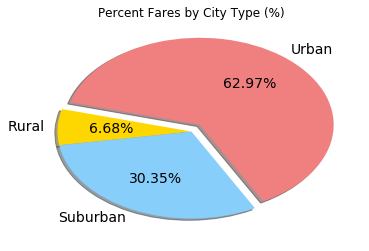

In [626]:
# Create PieChart for % of Total Fares by City Type
explode=[0, 0, 0.1]
ax = fares_citytype_df.plot(kind='pie', y = 'Percent Fare by Type (%)', autopct='%1.2f%%', startangle=165, shadow=True,\
                       labels=fares_citytype_df['type'], colors=["gold", "lightskyblue", 'lightcoral'],\
                       legend = False, fontsize=14, explode=explode)
#remove the yaxis label
ax.set_ylabel('')
plt.title("Percent Fares by City Type (%)")
plt.show()

In [627]:
## % of Total Rides by City Type

# count of rides by city type and total rides
count_rides_type = all_data2_df.groupby('type')["ride_id"].count()
total_rides = len(all_data2_df["ride_id"])
#print(count_rides_type)
#print(total_rides)

# % of Total Rides by City Type
percent_rides = count_rides_type / total_rides * 100
#print(percent_rides)

rides_citytype_df = pd.DataFrame({"Rides by Type": count_rides_type, "Percent Rides by Type (%)": percent_rides}, \
                                columns = ["Rides by Type", "Percent Rides by Type (%)"])
rides_citytype_df["Percent Rides by Type (%)"] = rides_citytype_df["Percent Rides by Type (%)"].map('{:.2f}'.format)

# converting the % ride to float
rides_citytype_df["Percent Rides by Type (%)"] = pd.to_numeric(rides_citytype_df["Percent Rides by Type (%)"], errors='ignore')

rides_citytype_df = rides_citytype_df.reset_index()
rides_citytype_df



,type,Rides by Type,Percent Rides by Type (%)
0,Rural,125,5.26
1,Suburban,625,26.32
2,Urban,1625,68.42


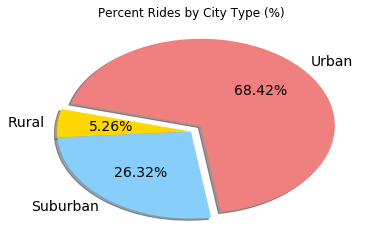

In [628]:
# Create PieChart for % of Total Rides by City Type
explode=[0, 0, 0.1]
ax = rides_citytype_df.plot(kind='pie', y = 'Percent Rides by Type (%)', autopct='%1.2f%%', startangle=165, shadow=True,\
                       labels=rides_citytype_df['type'], colors=["gold", "lightskyblue", 'lightcoral'], legend = False,\
                       fontsize=14, explode=explode)
ax.set_ylabel('')
plt.title("Percent Rides by City Type (%)")
plt.show()

In [629]:
#city_data_new_df.head()

In [630]:
## % of Total Drivers by City Type

# sum of drivers by city type and total drivers
sum_drivers_type = city_data_new_df.groupby('type')["Total Drivers Per City"].sum()
total_drivers = city_data_new_df["Total Drivers Per City"].sum()
#print(sum_drivers_type)
print(total_drivers)

# % of Total Drivers by City Type
percent_drivers = sum_drivers_type / total_drivers * 100
#print(percent_drivers)

drivers_citytype_df = pd.DataFrame({"Drivers by Type": sum_drivers_type, "Percent Drivers by Type (%)": percent_drivers}, \
                                columns = ["Drivers by Type", "Percent Drivers by Type (%)"])
drivers_citytype_df["Percent Drivers by Type (%)"] = drivers_citytype_df["Percent Drivers by Type (%)"].map('{:.2f}'.format)

# converting the % ride to float
drivers_citytype_df["Percent Drivers by Type (%)"] = pd.to_numeric(drivers_citytype_df["Percent Drivers by Type (%)"], \
                                                                   errors='ignore')

drivers_citytype_df = drivers_citytype_df.reset_index()
drivers_citytype_df

3349


,type,Drivers by Type,Percent Drivers by Type (%)
0,Rural,104,3.11
1,Suburban,638,19.05
2,Urban,2607,77.84


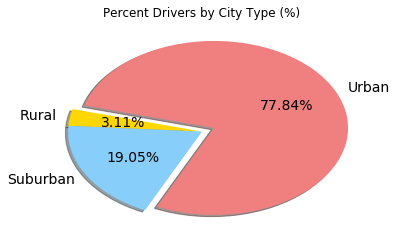

In [631]:
# Create PieChart for % of Total Drivers by City Type

explode=[0, 0, 0.1]
ax = drivers_citytype_df.plot(kind='pie', y = 'Percent Drivers by Type (%)', autopct='%1.2f%%', startangle=165, shadow=True,\
                       labels=drivers_citytype_df['type'], colors=["gold", "lightskyblue", 'lightcoral'], \
                         legend = False, fontsize=14, explode=explode)

ax.set_ylabel('')
plt.title("Percent Drivers by City Type (%)")
plt.show()